In [68]:
from web3 import Web3
import json
import requests
import csv
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from time import *
import plotly.express as px
import plotly.io as pio
pd.options.plotting.backend = "plotly"
pio.renderers.default = "plotly_mimetype+notebook_connected"
import plotly.graph_objects as go
import math
import warnings
import scipy.stats
import random

## Imports

In [69]:
df = pd.read_csv('txs_12965_13080.csv')
df

block_number              value     gas  gas_used     gas_price  \
0             12965401                  0   96104     96104  101000000000   
1             12965401                  0  273553    230971  101000000000   
2             12965401  50000000000000000  269801    191485  100000000000   
3             12965401                  0   90212     40212  100000000000   
4             12965401  10000000000000000   21000     21000  100000000000   
...                ...                ...     ...       ...           ...   
21392175      13079998  34422358000000000  215887    163754   42008846465   
21392176      13079998                  0   69529     63209   42000001347   
21392177      13079998   2730000000000000   21000     21000   42000000000   
21392178      13079998   9118000000000000   21000     21000   42000000000   
21392179      13079998                  0   65172     53960   42000000000   

          max_fee_per_gas  max_priority_fee_per_gas  transaction_type  
0                     NaN                       NaN                 0  
1                     NaN                       NaN                 0  
2            1.000000e+11              1.000000e+11                 2  
3                     NaN                       NaN                 0  
4                     NaN                       NaN                 0  
...                   ...                       ...               ...  
21392175     5.455381e+10              1.347988e+09                 2  
21392176              NaN                       NaN                 0  
21392177              NaN                       NaN                 0  
21392178              NaN                       NaN                 0  
21392179              NaN                       NaN                 0  

[21392180 rows x 8 columns]

In [70]:
df['gas_price'] = 0.000000001*df['gas_price']

In [71]:
df['product'] = df['gas']*df['gas_price']

In [73]:
blockwise_sum = {}

In [74]:
for i in range(len(df['block_number'])):
    if int(df['block_number'][i]) in blockwise_sum:
        blockwise_sum[int(df['block_number'][i])] += int(df['product'][i])
    else:
        blockwise_sum[int(df['block_number'][i])] = int(df['product'][i])

In [75]:
gas_used_sum = {}

In [76]:
for i in range(len(df['block_number'])):
    if int(df['block_number'][i]) in gas_used_sum:
        gas_used_sum[int(df['block_number'][i])] += int(df['gas'][i])
    else:
        gas_used_sum[int(df['block_number'][i])] = int(df['gas'][i])

In [77]:
blockwise_average = {}

for i in gas_used_sum:
    blockwise_average[i] = blockwise_sum[i]/gas_used_sum[i]

In [78]:
results = []

for i in range(len(df)):
    results.append(blockwise_average[df['block_number'][i]])
    
df['blockwise_average_gas_fees'] = results

In [79]:
df.to_csv('txs_12965_13080_with_avg.csv')

In [80]:
counts = df['block_number'].value_counts()

In [81]:
results = []

for i in range(len(df)):
    results.append(counts[df['block_number'][i]])
    
df['n'] = results

In [82]:
df['(x - xi)'] = (df['gas_price'] - df['blockwise_average_gas_fees'])

In [94]:
legacy = df[df['transaction_type'] != 2]
eip1559 = df[df['transaction_type'] == 2]

In [114]:
len(legacy)

16256099

In [115]:
len(eip1559)

5136081

In [125]:
variance = {}

for i in burst.index:
    s = float(burst['(x - xi)'][i])
    if burst['block_number'][i] in variance:
        variance[burst['block_number'][i]] += ((s**2)/burst['n'][i])
    else:
        variance[burst['block_number'][i]] = ((s**2)/burst['n'][i])

In [111]:
df2 = pd.DataFrame(variance.items(), columns=['blk no.', 'variance'])
df2
df2['variance_str'] = str(df2['variance'])

In [112]:
df2['variance'].describe()

count    1.040820e+05
mean     2.310028e+03
std      6.744701e+04
min      0.000000e+00
25%      3.433105e+00
50%      1.471346e+01
75%      6.695652e+01
max      1.013429e+07
Name: variance, dtype: float64

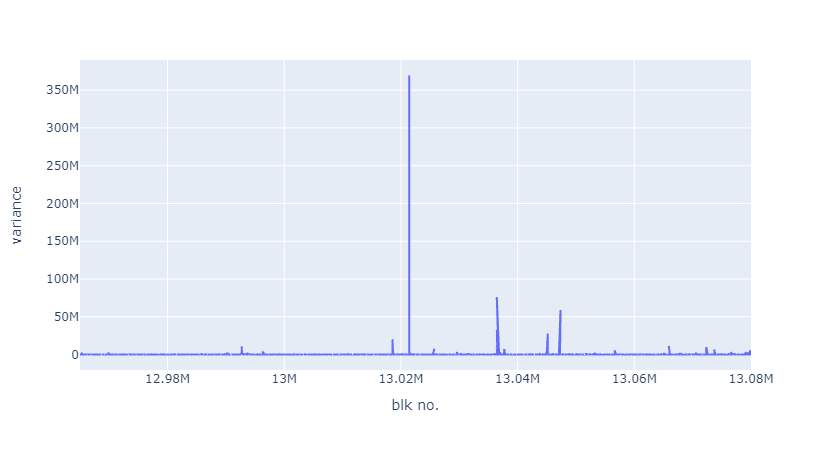

In [108]:
fig = px.line(df2, x="blk no.", y="variance")
fig.show()

In [87]:
df

block_number              value     gas  gas_used   gas_price  \
0             12965401                  0   96104     96104  101.000000   
1             12965401                  0  273553    230971  101.000000   
2             12965401  50000000000000000  269801    191485  100.000000   
3             12965401                  0   90212     40212  100.000000   
4             12965401  10000000000000000   21000     21000  100.000000   
...                ...                ...     ...       ...         ...   
21392175      13079998  34422358000000000  215887    163754   42.008846   
21392176      13079998                  0   69529     63209   42.000001   
21392177      13079998   2730000000000000   21000     21000   42.000000   
21392178      13079998   9118000000000000   21000     21000   42.000000   
21392179      13079998                  0   65172     53960   42.000000   

          max_fee_per_gas  max_priority_fee_per_gas  transaction_type  \
0                     NaN                       NaN                 0   
1                     NaN                       NaN                 0   
2            1.000000e+11              1.000000e+11                 2   
3                     NaN                       NaN                 0   
4                     NaN                       NaN                 0   
...                   ...                       ...               ...   
21392175     5.455381e+10              1.347988e+09                 2   
21392176              NaN                       NaN                 0   
21392177              NaN                       NaN                 0   
21392178              NaN                       NaN                 0   
21392179              NaN                       NaN                 0   

               product  blockwise_average_gas_fees    n   (x - xi)  
0         9.706504e+06                  132.267414  223 -31.267414  
1         2.762885e+07                  132.267414  223 -31.267414  
2         2.698010e+07                  132.267414  223 -32.267414  
3         9.021200e+06                  132.267414  223 -32.267414  
4         2.100000e+06                  132.267414  223 -32.267414  
...                ...                         ...  ...        ...  
21392175  9.069164e+06                   54.607703  320 -12.598857  
21392176  2.920218e+06                   54.607703  320 -12.607702  
21392177  8.820000e+05                   54.607703  320 -12.607703  
21392178  8.820000e+05                   54.607703  320 -12.607703  
21392179  2.737224e+06                   54.607703  320 -12.607703  

[21392180 rows x 12 columns]

In [113]:
df2.to_csv('df_burst.csv')